In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('nutri_df.csv')
df

,Unnamed: 0,recipe_id,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,recipe_rating
0,0,137739,51.5,0,13,0,2,0,4,5.0
1,1,31490,173.4,18,0,17,22,35,1,3.5
2,2,112140,269.8,22,32,48,39,27,5,4.0
3,3,59389,368.1,17,10,2,14,8,20,4.5
4,4,44061,352.9,1,337,23,3,0,28,5.0
...,...,...,...,...,...,...,...,...,...,...
231632,231632,486161,415.2,26,34,26,44,21,15,5.0
231633,231633,493372,14.8,0,2,58,1,0,1,5.0
231634,231634,308080,59.2,6,2,3,6,5,0,5.0
231635,231635,298512,188.0,11,57,11,7,21,9,1.0


## 1. Distribution of Rating

In [32]:
df.groupby('recipe_rating').size()

recipe_rating
0.000000      5047
0.142857         1
0.200000         1
0.250000         3
0.333333        17
             ...  
4.972222         2
4.972973         2
4.975610         1
4.990783         1
5.000000    100428
Length: 2376, dtype: int64

Text(0.5, 1.0, 'Rating Distribution of All Recipes')

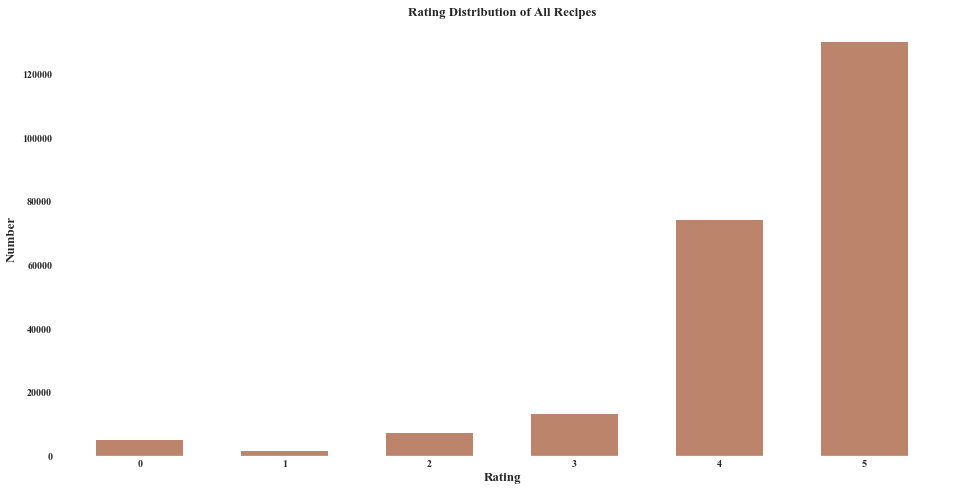

In [121]:
df['recipe_rating'] = df['recipe_rating'].apply(lambda x: round(x, 0))
matplotlib.rc('axes',edgecolor='white')
matplotlib.rcParams['font.family'] = 'Times New Roman'  
# plt.style.use('seaborn-white')
fig = plt.figure(figsize = (16, 8))
x = [0,1,2,3,4,5]
plt.bar(x, df.groupby('recipe_rating').size(), alpha = 0.7, width = 0.6, color = 'sienna')
plt.xlabel('Rating', fontsize = 13)
plt.ylabel('Number', fontsize = 13)
plt.title('Rating Distribution of All Recipes', fontsize = 13)

In [34]:
recip = pd.read_csv('RAW_recipes.csv')
recip.drop('steps', axis=1, inplace=True)
recip.set_index('id',inplace=True)

In [35]:
tmp = recip['ingredients'].apply(lambda x: x.replace(']','').replace('[','').replace('\'','').split(', '))
all_ingred = []
for x in tmp.values:
    all_ingred.extend(x)
len_list = [len(x) for x in tmp.values]
tmp_index = [list(index*np.ones(length)) for (index,length) in zip(tmp.index,len_list)]
all_ingred_index = []
for x in tmp_index:
    all_ingred_index.extend(x)
ingred_df = pd.DataFrame({'recipe_id':all_ingred_index, 'ingredients':all_ingred})
# ingred_df = ingred_df.merge(recip[['name','recipe_rating']], right_index=True, left_on='recipe_id')

## 2. The most popular ingredients (teh national food)

In [36]:
ingred_df.groupby('ingredients').size().sort_values(ascending=False)[:30].to_csv('ingri.csv')

In [116]:
a = ['garlic cloves', 'milk', 'eggs', 'water', 'onion', 'butter']
b = ['brown sugar', 'pepper', 'flour', 'olive oil', 'sugar', 'salt']

Text(0.5, 1.0, 'Most Frequently Used Flavor')

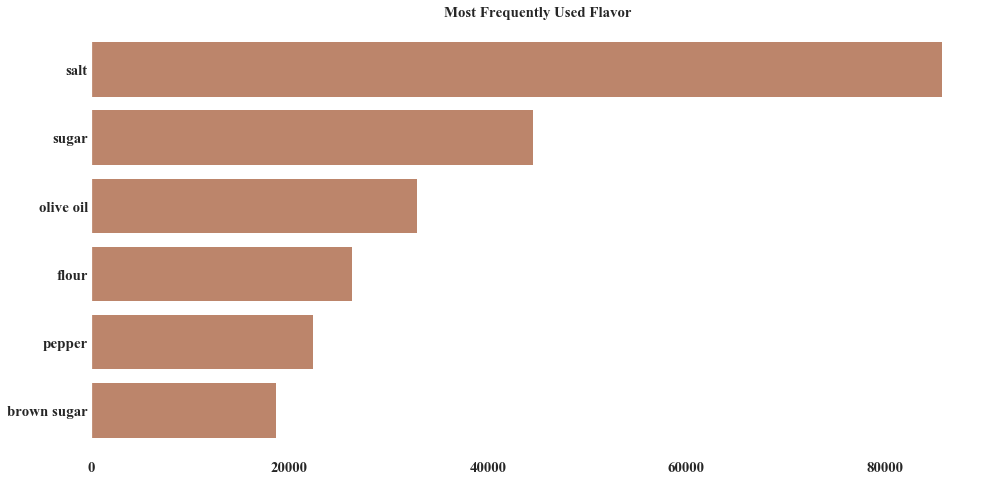

In [119]:
fig = plt.figure(figsize = (16, 8))
x = list(ingred_df.groupby('ingredients').size().sort_values(ascending=False)[:30].index)
plt.barh(b, list(ingred_df.groupby('ingredients').size().sort_values(ascending=False)[b]), alpha = 0.7, color = 'sienna')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.xticks(rotation = 90, fontsize = 12)
# plt.ylabel('Number', fontsize = 15)
plt.title('Most Frequently Used Flavor', fontsize = 15)

## 2+ The national food (wordcloud)

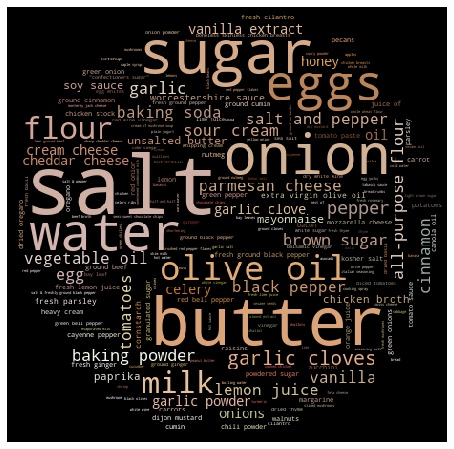

In [38]:

import wordcloud
import collections
from PIL import Image

word_counts = collections.Counter(ingred_df['ingredients'])
mask = np.array(Image.open('/Users/thelmaaaa/Desktop/food.com/p1305281a405989003-ss.jpg'))
wc = wordcloud.WordCloud(
     max_words = 200, 
     max_font_size = 100,
     mask = mask
)
fig = plt.figure(figsize = (10, 8))
wc.generate_from_frequencies(word_counts)
image_colors = wordcloud.ImageColorGenerator(mask)
wc.recolor(color_func = image_colors) 
plt.imshow(wc) 
plt.axis('off')
plt.show()

## 3. Ratings and nutritions 

In [39]:
calor = []
total_fat = []
sugar = []
sodium = []
protein = []
sat_fat = []
carb = []
for i in range(0, 6):
    calor.append(df[df['recipe_rating'] == i]['calories'].mean())
    total_fat.append(df[df['recipe_rating'] == i]['total_fat'].mean())
    sugar.append(df[df['recipe_rating'] == i]['sugar'].mean())
    sodium.append(df[df['recipe_rating'] == i]['sodium'].mean())
    protein.append(df[df['recipe_rating'] == i]['protein'].mean())
    sat_fat.append(df[df['recipe_rating'] == i]['saturated_fat'].mean())
    carb.append(df[df['recipe_rating'] == i]['carbohydrates'].mean())

Text(0.5, 1.0, 'Mean Carbonhydrates Levels at Different Ratings')

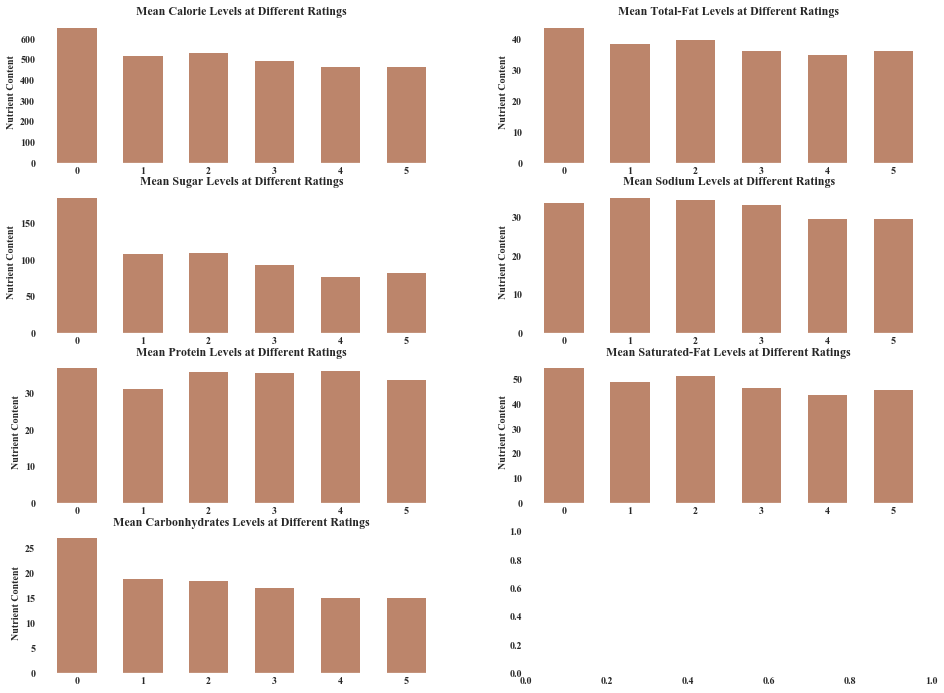

In [122]:
COL_NUM = 2
ROW_NUM = 4
x = [0, 1, 2, 3, 4, 5]
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize = (16, 12))

ax1 = axes[0, 0]
ax1.bar(x, calor, alpha = 0.7, width = 0.6, color = 'sienna')
# ax1.xlabel('Rating')
ax1.set_ylabel('Nutrient Content')
ax1.set_title('Mean Calorie Levels at Different Ratings')


ax2 = axes[0, 1]
ax2.bar(x, total_fat, alpha = 0.7, width = 0.6, color = 'sienna')
# ax2.xlabel('Rating')
ax2.set_ylabel('Nutrient Content')
ax2.set_title('Mean Total-Fat Levels at Different Ratings')


ax3 = axes[1, 0]
ax3.bar(x, sugar, alpha = 0.7, width = 0.6, color = 'sienna')
# ax3.xlabel('Rating')
ax3.set_ylabel('Nutrient Content')
ax3.set_title('Mean Sugar Levels at Different Ratings')


ax4 = axes[1, 1]
ax4.bar(x, sodium, alpha = 0.7, width = 0.6, color = 'sienna')
# ax4.xlabel('Rating')
ax4.set_ylabel('Nutrient Content')
ax4.set_title('Mean Sodium Levels at Different Ratings')


ax5 = axes[2, 0]
ax5.bar(x, protein, alpha = 0.7, width = 0.6, color = 'sienna')
# ax5.xlabel('Rating')
ax5.set_ylabel('Nutrient Content')
ax5.set_title('Mean Protein Levels at Different Ratings')


ax6 = axes[2, 1]
ax6.bar(x, sat_fat, alpha = 0.7, width = 0.6, color = 'sienna')
# ax6.xlabel('Rating')
ax6.set_ylabel('Nutrient Content')
ax6.set_title('Mean Saturated-Fat Levels at Different Ratings')


ax7 = axes[3, 0]
ax7.bar(x, carb, alpha = 0.7, width = 0.6, color = 'sienna')
# ax7.xlabel('Rating')
ax7.set_ylabel('Nutrient Content')
ax7.set_title('Mean Carbonhydrates Levels at Different Ratings')


## 4. Time series: ratings and number of reviews

In [43]:
import datetime

inter_df = pd.read_csv('RAW_interactions.csv')
#inter_df.drop('review', axis=1, inplace=True)
def with_indexing(dstr):                              
    return datetime.date(*map(int, [dstr[:4], dstr[5:7], dstr[8:10]])) 
inter_df['date'] = inter_df['date'].apply(with_indexing)
inter_df

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [44]:
inter_df['year'] = inter_df['date'].apply(lambda x: x.year)
inter_df['month'] = inter_df['date'].apply(lambda x: x.month)

Text(0.5, 1.0, 'Average Rating of Users Reviewing Recipes')

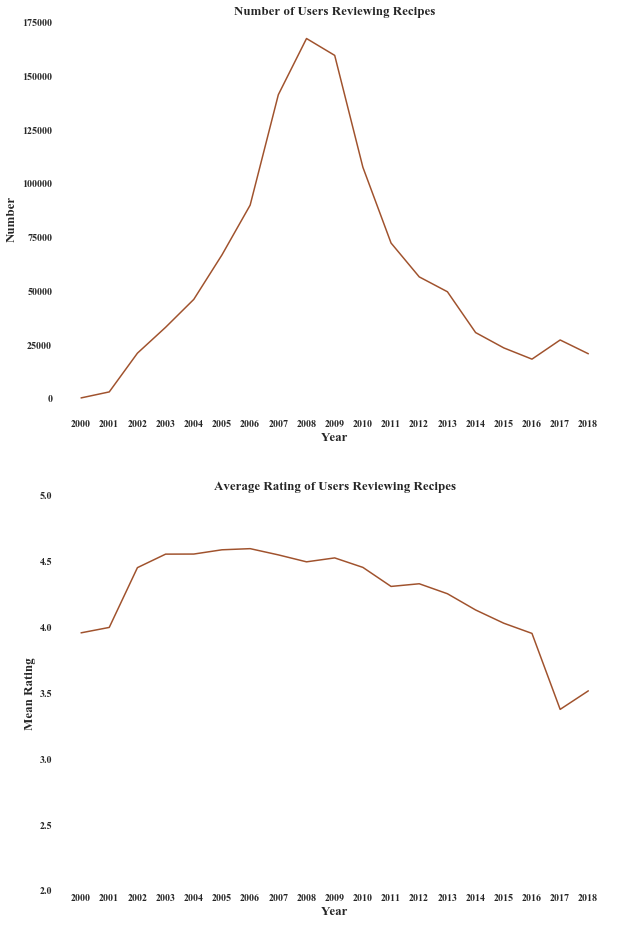

In [123]:
fig, axes = plt.subplots(2, 1, figsize = (10, 16))

x = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

ax1 = axes[0]
ax1.plot(x, inter_df.groupby('year').size(), color = 'sienna')
ax1.set_xlabel('Year', fontsize = 13)
ax1.set_ylabel('Number', fontsize = 13)
ax1.set_title('Number of Users Reviewing Recipes', fontsize = 13)

ax2 = axes[1]
ax2.plot(x, inter_df.groupby('year')['rating'].mean(),  color = 'sienna')
ax2.set_xlabel('Year', fontsize = 13)
ax2.set_ylabel('Mean Rating', fontsize = 13)
ax2.set_ylim(2, 5)
ax2.set_title('Average Rating of Users Reviewing Recipes', fontsize = 13)

Text(0.5, 1.0, 'Average Rating of Users Reviewing Recipes in 2008')

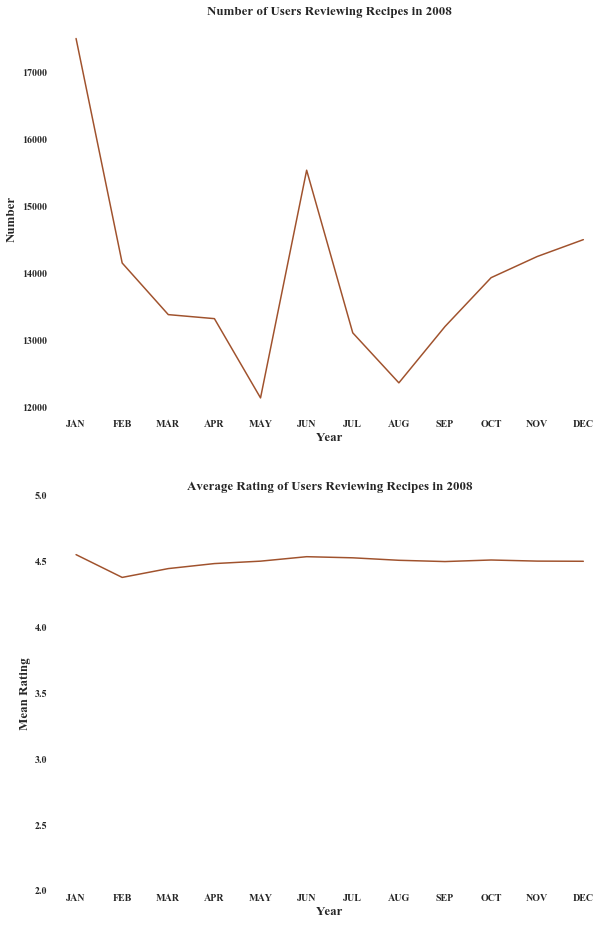

In [125]:
fig, axes = plt.subplots(2, 1, figsize = (10, 16))

x = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

ax1 = axes[0]
ax1.plot(x, inter_df[inter_df['year'] == 2008].groupby('month').size(),  color = 'sienna')
ax1.set_xlabel('Year', fontsize = 13)
ax1.set_ylabel('Number', fontsize = 13)
ax1.set_title('Number of Users Reviewing Recipes in 2008', fontsize = 13)

ax2 = axes[1]
ax2.plot(x, inter_df[inter_df['year'] == 2008].groupby('month')['rating'].mean(),  color = 'sienna')
ax2.set_xlabel('Year', fontsize = 13)
ax2.set_ylabel('Mean Rating', fontsize = 13)
ax2.set_ylim(2, 5)
ax2.set_title('Average Rating of Users Reviewing Recipes in 2008', fontsize = 13)

## 5. Change of Recipe features

In [48]:
recipe = pd.read_csv('RAW_recipes.csv').set_index('id')

In [49]:
recipe['tags'] = recipe['tags'].apply(lambda x :x[1:-1].replace("'", '').split(','))
recipe['tag_len'] = recipe['tags'].apply(lambda x: len(x))
recipe['year'] = recipe['submitted'].apply(lambda x: int(x.split('-')[0]))
recipe['month'] = recipe['submitted'].apply(lambda x: int(x.split('-')[1]))

Text(0.5, 1.0, 'Average Tag Length of Recipes Submitted')

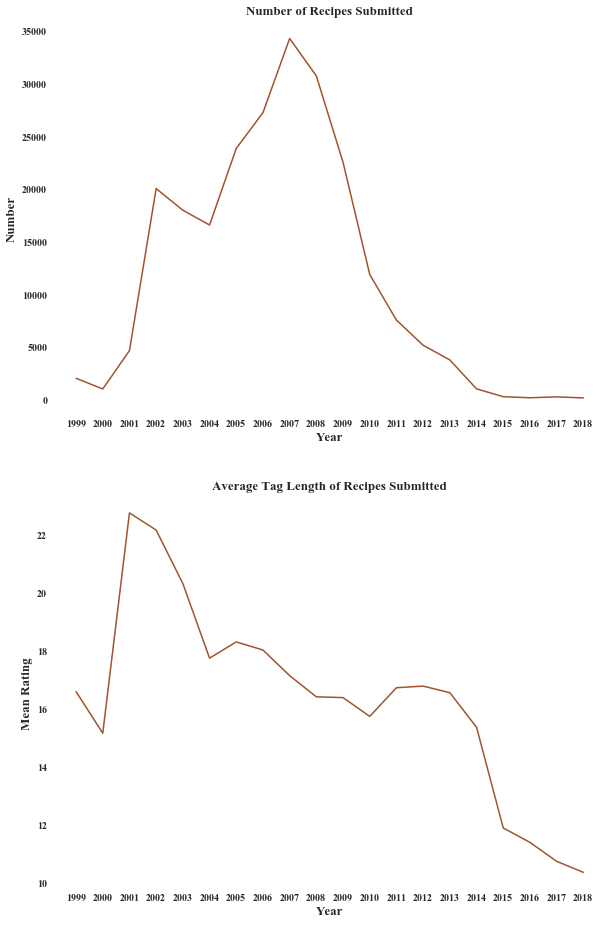

In [126]:
fig, axes = plt.subplots(2, 1, figsize = (10, 16))

x = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

ax1 = axes[0]
ax1.plot(x, recipe.groupby('year').size(),  color = 'sienna')
ax1.set_xlabel('Year', fontsize = 13)
ax1.set_ylabel('Number', fontsize = 13)
ax1.set_title('Number of Recipes Submitted', fontsize = 13)

ax2 = axes[1]
ax2.plot(x, recipe.groupby('year')['tag_len'].mean(), color = 'sienna')
ax2.set_xlabel('Year', fontsize = 13)
ax2.set_ylabel('Mean Rating', fontsize = 13)
ax2.set_title('Average Tag Length of Recipes Submitted', fontsize = 13)


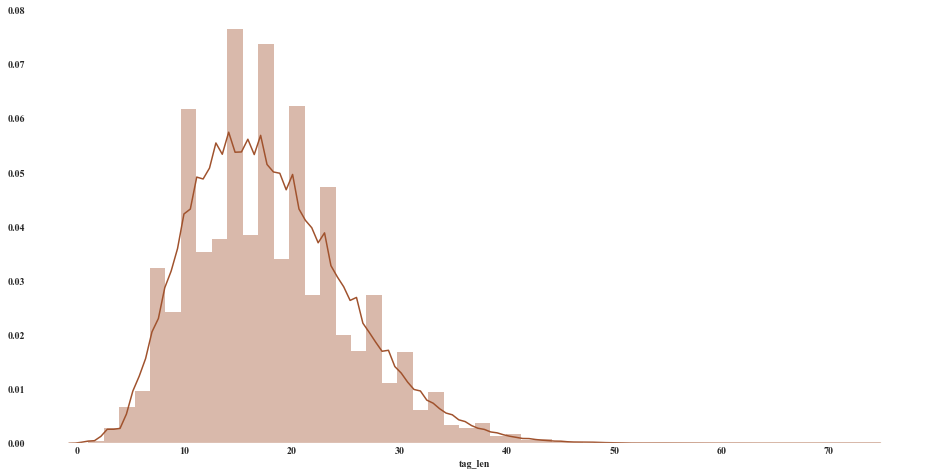

In [127]:
fig = plt.figure(figsize = (16, 8))
sns.distplot(recipe['tag_len'], color = 'sienna')

In [52]:
tags = recipe['tags']
all_tag = []
for x in tags.values:
    all_tag.extend(x)
len_list = [len(x) for x in tags.values]
tmp_index = [list(index*np.ones(length)) for (index,length) in zip(tags.index,len_list)]
all_tag_index = []
for x in tmp_index:
    all_tag_index.extend(x)
tag_df = pd.DataFrame({'recipe_id':all_tag_index, 'tags':all_tag})
# ingred_df = ingred_df.merge(recip[['name','recipe_rating']], right_index=True, left_on='recipe_id')

In [54]:
recipe_ = pd.read_csv('RAW_recipes.csv')
recipe_['year'] = recipe_['submitted'].apply(lambda x: int(x.split('-')[0]))
recipe_['month'] = recipe_['submitted'].apply(lambda x: int(x.split('-')[1]))

In [55]:
tag_df = tag_df.merge(recipe_[['year','month']], right_on = recipe_['id'], left_on = 'recipe_id')
tag_df['tags'] = tag_df['tags'].apply(lambda x: x.strip())

In [56]:
dic_ = dict()

for item in tag_df[tag_df['year'] == 1999].groupby('tags').size().sort_values(ascending = False)[:10].index:
    l = []
    for i in range(1999, 2019):
        l.append(tag_df[tag_df['year'] == i].groupby('tags').size()[item] / tag_df[tag_df['year'] == i].groupby('tags').size().sum())
    dic_[item] = l

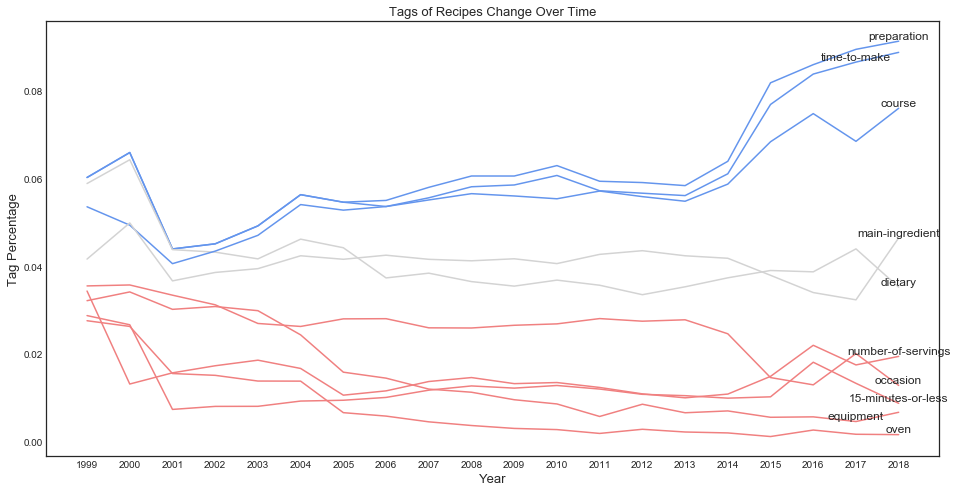

In [57]:
fig = plt.figure(figsize = (16, 8))
year = ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

plt.plot(year, dic_['preparation'], color = 'cornflowerblue')
plt.text('2018', dic_['preparation'][-1], 'preparation', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['time-to-make'], color = 'cornflowerblue')
plt.text('2017', dic_['time-to-make'][-2], 'time-to-make', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['dietary'], color = 'lightgrey')
plt.text('2018', dic_['dietary'][-1], 'dietary', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['course'], color = 'cornflowerblue')
plt.text('2018', dic_['course'][-1], 'course', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['main-ingredient'], color = 'lightgrey')
plt.text('2018', dic_['main-ingredient'][-1], 'main-ingredient', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['occasion'], color = 'lightcoral')
plt.text('2018', dic_['occasion'][-1], 'occasion', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['number-of-servings'], color = 'lightcoral')
plt.text('2018', dic_['number-of-servings'][-1], 'number-of-servings', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['equipment'], color = 'lightcoral')
plt.text('2017', dic_['equipment'][-2], 'equipment', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['15-minutes-or-less'], color = 'lightcoral')
plt.text('2018', dic_['15-minutes-or-less'][-1], '15-minutes-or-less', ha = 'center', va = 'bottom', fontsize = 12)
plt.plot(year, dic_['oven'], color = 'lightcoral')
plt.text('2018', dic_['oven'][-1], 'oven', ha = 'center', va = 'bottom', fontsize = 12)

plt.xlabel('Year', fontsize = 13)
plt.ylabel('Tag Percentage', fontsize = 13)
plt.title('Tags of Recipes Change Over Time', fontsize = 13)

plt.show()

## 6. Count the high frequency words of a specific rating

In [58]:
recipe_rating = inter_df.groupby('recipe_id')['rating']
recipe_rating.count().sort_values(ascending=False)

recipe_id
2886      1613
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
145847       1
145855       1
325766       1
145859       1
537716       1
Name: rating, Length: 231637, dtype: int64

In [59]:
#rating-statistics
recipe_rating.count().sort_values(ascending=False).describe()

count    231637.000000
mean          4.888541
std          17.532481
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1613.000000
Name: rating, dtype: float64

In [60]:
#filtering: drop recipes whose reviews are less than 100
count = recipe_rating.count()
count = count[count>100]
output = count.index
output

Int64Index([   607,    749,    916,   1005,   1356,   2496,   2886,   3180,
              3470,   3595,
            ...
            349246, 372087, 380988, 411501, 443758, 449452, 486261, 486496,
            486641, 497021],
           dtype='int64', name='recipe_id', length=769)

In [61]:
recipe_rating = inter_df.groupby('recipe_id').mean()['rating']
recip = recip.merge(pd.DataFrame(data = {'recipe_rating':recipe_rating.values}, index=recipe_rating.index), left_index=True, right_index=True)

In [95]:
name_rating = recip[['name', 'recipe_rating']]
filtered = name_rating[name_rating.index.isin(output)]

high = filtered[(filtered['recipe_rating']>4) & (filtered['recipe_rating']<=5)]
high

,name,recipe_rating
25775,how i got my family to eat spinach spinach ca...,4.150442
155959,ant kelly s london broil marinade,4.362832
32204,whatever floats your boat brownies,4.525410
49737,panera bread black bean soup,4.410891
26420,shrimp cocktail sauce,4.557692
...,...,...
33105,zesty low fat chicken breasts,4.541935
74730,zesty oven baked fries,4.750000
18693,zucchini chocolate cake,4.765152
749,zucchini lasagna lasagne low carb,4.378947


In [128]:
freq = high.name.str.split(expand=True).stack().value_counts()

In [129]:
ignore = ['and', 'with', 's','or','for','of','by','no','the','in']
freq = freq[~(freq.index.isin(ignore))]
print(freq)

chicken      109
bread         48
chocolate     41
pot           39
kittencal     37
            ... 
wholly         1
farmer         1
dollies        1
jolean         1
auntie         1
Length: 1027, dtype: int64


Text(0.5, 1.0, 'Bread is the Most Popular item to appear in the name of recipe (4 < Rating <= 5)')

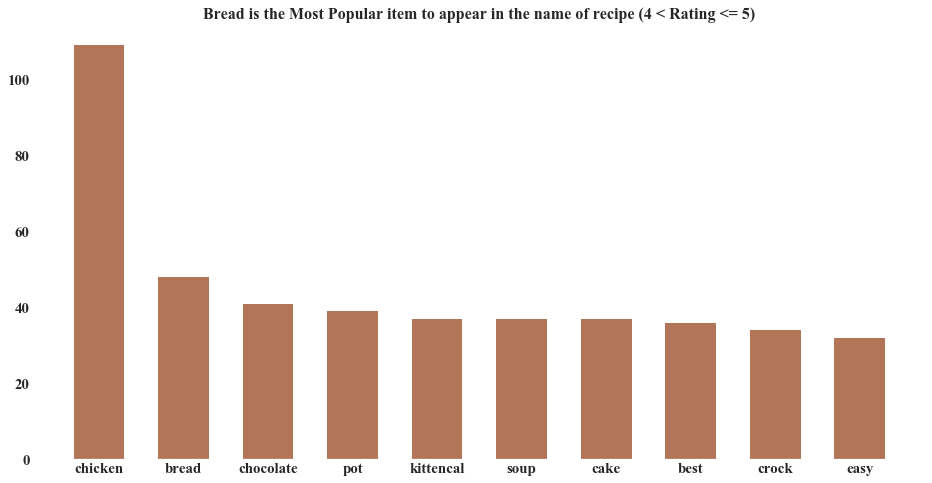

In [99]:
import matplotlib
fig = plt.subplots(figsize = (16, 8))

plt.bar(list(freq[:10].index), list(freq[:10]), color = 'sienna', alpha = 0.8, width = 0.6)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Bread is the Most Popular item to appear in the name of recipe (4 < Rating <= 5)', fontsize = 16)

Text(0.5, 1.0, "Chicken seems to be the most popular item to appear in the recepi's names")

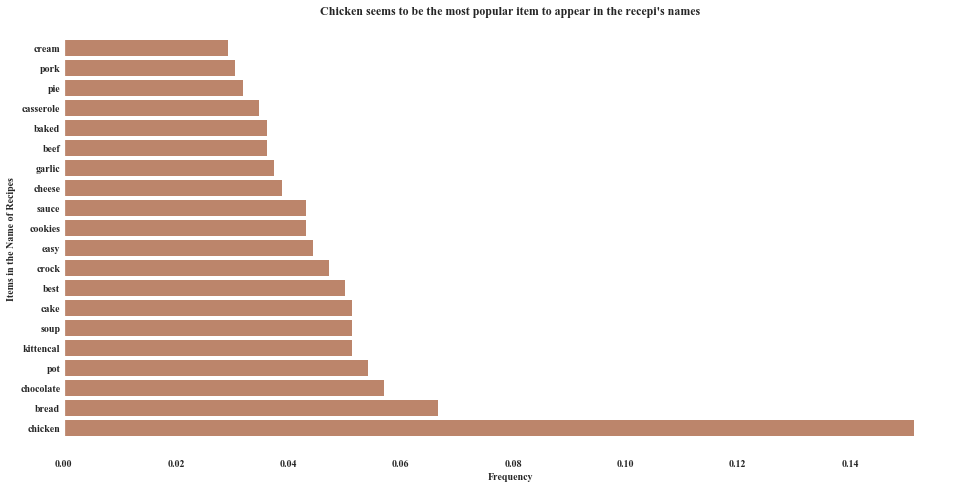

In [131]:
fig = plt.figure(figsize=(16, 8))
plt.barh(list(freq[:20].index), list(freq[:20]/len(high)), alpha = 0.7,  color = 'sienna')
plt.xlabel('Frequency')
plt.ylabel('Items in the Name of Recipes')
plt.title("Chicken seems to be the most popular item to appear in the recepi's names")

Chicken seems to be the most popular item to appear in the name of recipes.

## 7. Ratings and description

In [132]:
df = inter_df[['rating', 'review']]
df['review_length'] = df['review'].apply(lambda x:len(str(x)))
df

,rating,review,review_length
0,4,Great with a salad. Cooked on top of stove for...,138
1,5,"So simple, so delicious! Great for chilly fall...",205
2,4,This worked very well and is EASY. I used not...,99
3,5,I made the Mexican topping and took it to bunk...,68
4,5,"Made the cheddar bacon topping, adding a sprin...",73
...,...,...,...
1132362,0,Another approach is to start making sauce with...,105
1132363,5,These were so delicious! My husband and I tru...,363
1132364,5,WOW! Sometimes I don't take the time to rate ...,577
1132365,4,Very good! I used regular port as well. The ...,115


In [133]:
# rating length‘s statistics
rating_group = df.groupby('rating')
rating_group_describe = rating_group['review_length'].describe()
rating_group_describe

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
0,60847.0,250.648315,216.105830,1.0,108.0,195.0,327.0,5799.0
1,12818.0,253.407162,209.628238,1.0,117.0,202.0,327.0,3024.0
2,14123.0,280.330808,219.568001,1.0,138.0,229.0,360.0,4146.0
3,40855.0,300.543459,221.516185,1.0,156.0,251.0,383.0,4652.0
4,187360.0,290.887612,201.223258,1.0,158.0,248.0,372.0,6972.0
5,816364.0,276.809458,192.803108,1.0,148.0,237.0,356.0,8587.0


In [134]:
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

recip['description'] = recip['description'].apply(lambda x: str(x))

In [135]:
recip['description_token'] = recip['description'].apply(lambda x: word_tokenize(x))

In [136]:
wordlist = []
for i in range(len(recip)):
    wordlist.extend(recip['description_token'].iloc[i])

In [137]:
for i in range(len(wordlist)):
    wordlist[i] = wordlist[i].lower()

In [139]:
#ignore stop words
from nltk import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
wordlist = [word for word in wordlist if not word in stop_words] 

In [140]:
wordlist = [word for word in wordlist if not word in list(string.punctuation)] 

# #clean mannually
ignore = ['recipe',"'s","n't","''",'``','--','...']
wordlist = [word for word in wordlist if not word in ignore] 

In [310]:
from collections import Counter
wordfreq_dict = Counter(wordlist)

wordfreq_dict = {k: v for k, v in sorted(wordfreq_dict.items(), key=lambda item: item[1],reverse=True)}

## 8. Recipes: Essential User Skills

In [142]:
TECHNIQUES_LIST = [
    'bake',
    'barbecue',
    'blanch',
    'blend',
    'boil',
    'braise',
    'brine',
    'broil',
    'caramelize',
    'combine',
    'crock pot',
    'crush',
    'deglaze',
    'devein',
    'dice',
    'distill',
    'drain',
    'emulsify',
    'ferment',
    'freez',
    'fry',
    'grate',
    'griddle',
    'grill',
    'knead',
    'leaven',
    'marinate',
    'mash',
    'melt',
    'microwave',
    'parboil',
    'pickle',
    'poach',
    'pour',
    'pressure cook',
    'puree',
    'refrigerat',
    'roast',
    'saute',
    'scald',
    'scramble',
    'shred',
    'simmer',
    'skillet',
    'slow cook',
    'smoke',
    'smooth',
    'soak',
    'sous-vide',
    'steam',
    'stew',
    'strain',
    'tenderize',
    'thicken',
    'toast',
    'toss',
    'whip',
    'whisk',
]

In [143]:
token_recipe = pd.read_csv('PP_recipes.csv')

In [144]:
# Converting to list
import json
token_recipe['techniques'] = token_recipe['techniques'].apply(lambda x:json.loads(x))

# Converting to np.array
token_recipe['techniques'] = np.array(token_recipe['techniques'])

for i in range(178265):
    if len(token_recipe['techniques'].iloc[i]) != 58:
        print(i)
    if i == 178264:
        print('all set')

all set


In [145]:
# summing up
count = np.zeros_like(token_recipe['techniques'][0])
for i in range(178265):
    count += token_recipe['techniques'].iloc[i] 
count

array([64821,  1240,   565, 29387, 42354,   114,   213,  5178,   910,
       60136,  2628,  4737,   603,   264,  4156,     6, 29567,    64,
          32,  5405, 15086,  5584,  1248,  8942,  2702,    11,  4437,
        6460, 30865,  6405,   152,   984,   329, 48747,   222,  4535,
       20543,  6677, 15835,   255,   615,  4702, 29380, 26825,  2498,
        1023, 20465,  3397,     0,  3775,  1074,  3605,   143, 11753,
        6259, 18166,  7933, 16467])

In [146]:
tech_freq = { k:v for (k,v) in zip(TECHNIQUES_LIST, count)}
tech_freq_sorted = {k: v for k, v in sorted(tech_freq.items(), key=lambda item: item[1],reverse=True)}
l = []
for key in tech_freq_sorted.keys():
    l.append(tech_freq_sorted[key])
value = l[:10]
tech = ['bake', 'combine', 'pour', 'boil', 'melt', 'drain', 'blend', 'simmer', 'skillet', 'refrigerat']

Text(0.5, 1.0, 'Bake is the most required techniques for cooking')

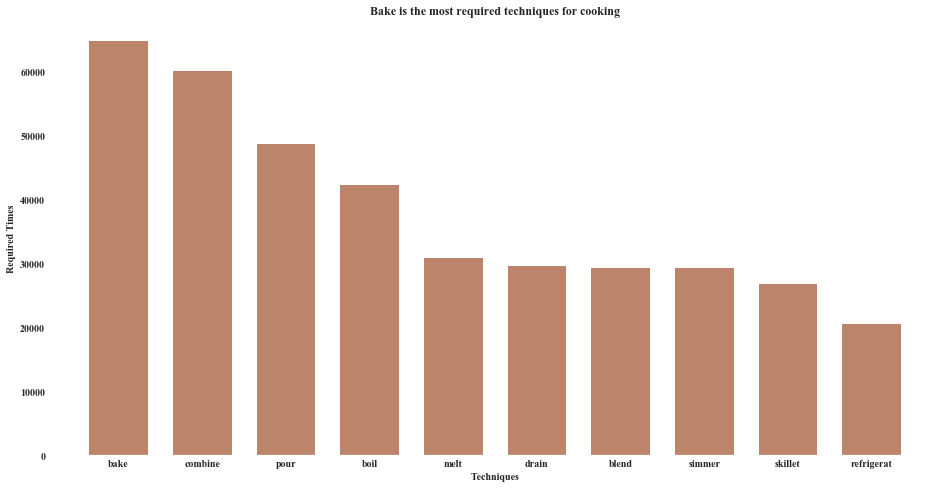

In [147]:
fig = plt.figure(figsize = (16, 8))
plt.bar(tech, value, alpha = 0.7, width = 0.7,  color = 'sienna')
plt.xlabel('Techniques')
plt.ylabel('Required Times')
plt.title('Bake is the most required techniques for cooking')